In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
%matplotlib inline

In [82]:
fpath_bloomberg = 'facebook_data_bloombergmarkets_comments_sentiment_4dict.tsv'
post_data_bloomberg = pd.read_csv(fpath_bloomberg, sep='\t')
post_data_bloomberg["News_Agiency"] = 'Bloomberg'

fpath_businessinsider= 'facebook_data_businessinsider_comments_sentiment_4dict.tsv'
post_data_businessinsider = pd.read_csv(fpath_businessinsider, sep='\t')
post_data_businessinsider["News_Agiency"] = 'Businessinsider'

fpath_CNN = 'facebook_data_CNN_comments_sentiment_4dict.tsv'
post_data_CNN = pd.read_csv(fpath_CNN, sep='\t')
post_data_CNN["News_Agiency"] = 'CNN'

fpath_Forbes = 'facebook_data_Forbes_comments_sentiment_4dict.tsv'
post_data_Forbes = pd.read_csv(fpath_Forbes, sep='\t')
post_data_Forbes["News_Agiency"] = 'Forbes'

fpath_FoxNews = 'facebook_data_FoxNews_comments_sentiment_4dict.tsv'
post_data_FoxNews = pd.read_csv(fpath_FoxNews, sep='\t')
post_data_FoxNews["News_Agiency"] = 'FoxNews'

fpath_investorsbusinessdaily = 'facebook_data_investorsbusinessdaily_comments_sentiment_4dict.tsv'
post_data_investorsbusinessdaily = pd.read_csv(fpath_investorsbusinessdaily, sep='\t')
post_data_investorsbusinessdaily["News_Agiency"] = 'investorsbusinessdaily'

fpath_nytimes = 'facebook_data_nytimes_comments_sentiment_4dict.tsv'
post_data_nytimes = pd.read_csv(fpath_nytimes, sep='\t')
post_data_nytimes["News_Agiency"] = 'nytimes'

fpath_washingtonpost = 'facebook_data_washingtonpost_comments_sentiment_4dict.tsv'
post_data_washingtonpost = pd.read_csv(fpath_washingtonpost, sep='\t')
post_data_washingtonpost["News_Agiency"] = 'washingtonpost'

fpath_WSJ = 'facebook_data_WSJ_comments_sentiment_4dict.tsv'
post_data_WSJ = pd.read_csv(fpath_WSJ, sep='\t')
post_data_WSJ["News_Agiency"] = 'WSJ'

C:\Users\Windows\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type int64

In [47]:
post_data = pd.concat([post_data_bloomberg
                      #,post_data_businessinsider
                      #,post_data_CNN
                      #,post_data_Forbes
                      #,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      ,post_data_WSJ])
post_data.head()

,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,WNPositive,WNNegative,WNNeutral,...,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,News_Agiency
0,0,3.863623e+15,2021-05-21 04:02:00,3864171976984432,2021-05-20 00:00:00,shawn.wang.182?fref=nf&rc=p&refid=52&__tn__=R,"Once move, no more fancy financial jobs and do...",0.250,1.250,7.500,...,-0.125000,0,0,8,0.0,0.000,0.298,0.702,-0.6249,Bloomberg
1,1,3.863623e+15,2021-05-21 04:02:00,3867806723287624,2021-05-22 00:00:00,winnie.ngo.984?fref=nf&rc=p&refid=52&__tn__=R,What are you afraid of? Since you do not like ...,1.125,1.875,30.000,...,-0.055556,0,0,36,0.0,0.061,0.074,0.865,-0.1521,Bloomberg
2,2,3.862680e+15,2021-05-20 19:40:00,3863764727025157,2021-05-20 00:00:00,sefanaia.m.kaumaitotoya?fref=nf&rc=p&refid=52...,So now it’s taxable. Why don’t you approve eve...,0.750,0.000,3.250,...,0.200000,0,0,5,0.0,0.153,0.000,0.847,0.4404,Bloomberg
3,3,3.862680e+15,2021-05-20 19:40:00,3862704397131190,2021-05-20 00:00:00,mike.chevalier.90281?fref=nf&rc=p&refid=52&__...,Good! It is becoming a legitimate asset class....,1.750,0.250,3.000,...,0.500000,0,0,6,0.0,0.493,0.000,0.507,0.8655,Bloomberg
4,4,3.862680e+15,2021-05-20 19:40:00,3869349806466649,2021-05-22 00:00:00,jimbopresto?fref=nf&rc=p&refid=52&__tn__=R,Sounds like my kids will have a couple differe...,0.625,0.000,3.375,...,0.500000,0,0,6,0.0,0.238,0.000,0.762,0.3612,Bloomberg


In [48]:
post_data = pd.concat([post_data
                      ,post_data_businessinsider
                      #,post_data_CNN
                      #,post_data_Forbes
                      #,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])


,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,WNPositive,WNNegative,WNNeutral,...,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,News_Agiency
0,0,3.863623e+15,2021-05-21 04:02:00,3864171976984432,2021-05-20 00:00:00,shawn.wang.182?fref=nf&rc=p&refid=52&__tn__=R,"Once move, no more fancy financial jobs and do...",0.250,1.250,7.500,...,-0.125000,0,0,8,0.0,0.000,0.298,0.702,-0.6249,Bloomberg
1,1,3.863623e+15,2021-05-21 04:02:00,3867806723287624,2021-05-22 00:00:00,winnie.ngo.984?fref=nf&rc=p&refid=52&__tn__=R,What are you afraid of? Since you do not like ...,1.125,1.875,30.000,...,-0.055556,0,0,36,0.0,0.061,0.074,0.865,-0.1521,Bloomberg
2,2,3.862680e+15,2021-05-20 19:40:00,3863764727025157,2021-05-20 00:00:00,sefanaia.m.kaumaitotoya?fref=nf&rc=p&refid=52...,So now it’s taxable. Why don’t you approve eve...,0.750,0.000,3.250,...,0.200000,0,0,5,0.0,0.153,0.000,0.847,0.4404,Bloomberg
3,3,3.862680e+15,2021-05-20 19:40:00,3862704397131190,2021-05-20 00:00:00,mike.chevalier.90281?fref=nf&rc=p&refid=52&__...,Good! It is becoming a legitimate asset class....,1.750,0.250,3.000,...,0.500000,0,0,6,0.0,0.493,0.000,0.507,0.8655,Bloomberg
4,4,3.862680e+15,2021-05-20 19:40:00,3869349806466649,2021-05-22 00:00:00,jimbopresto?fref=nf&rc=p&refid=52&__tn__=R,Sounds like my kids will have a couple differe...,0.625,0.000,3.375,...,0.500000,0,0,6,0.0,0.238,0.000,0.762,0.3612,Bloomberg


In [49]:
post_data = pd.concat([post_data
                      #,post_data_businessinsider
                      ,post_data_CNN
                      #,post_data_Forbes
                      #,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])
post_data.head()

,ID,PostID,PostDate,CommentID,CommentDate,CommenterURL,CommentText,WNPositive,WNNegative,WNNeutral,...,HVSentiAvg,LMPositive,LMNegative,LMTokenQnt,LMSentiAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,News_Agiency
0,0,3.863623e+15,2021-05-21 04:02:00,3864171976984432,2021-05-20 00:00:00,shawn.wang.182?fref=nf&rc=p&refid=52&__tn__=R,"Once move, no more fancy financial jobs and do...",0.250,1.250,7.500,...,-0.125000,0,0,8,0.0,0.000,0.298,0.702,-0.6249,Bloomberg
1,1,3.863623e+15,2021-05-21 04:02:00,3867806723287624,2021-05-22 00:00:00,winnie.ngo.984?fref=nf&rc=p&refid=52&__tn__=R,What are you afraid of? Since you do not like ...,1.125,1.875,30.000,...,-0.055556,0,0,36,0.0,0.061,0.074,0.865,-0.1521,Bloomberg
2,2,3.862680e+15,2021-05-20 19:40:00,3863764727025157,2021-05-20 00:00:00,sefanaia.m.kaumaitotoya?fref=nf&rc=p&refid=52...,So now it’s taxable. Why don’t you approve eve...,0.750,0.000,3.250,...,0.200000,0,0,5,0.0,0.153,0.000,0.847,0.4404,Bloomberg
3,3,3.862680e+15,2021-05-20 19:40:00,3862704397131190,2021-05-20 00:00:00,mike.chevalier.90281?fref=nf&rc=p&refid=52&__...,Good! It is becoming a legitimate asset class....,1.750,0.250,3.000,...,0.500000,0,0,6,0.0,0.493,0.000,0.507,0.8655,Bloomberg
4,4,3.862680e+15,2021-05-20 19:40:00,3869349806466649,2021-05-22 00:00:00,jimbopresto?fref=nf&rc=p&refid=52&__tn__=R,Sounds like my kids will have a couple differe...,0.625,0.000,3.375,...,0.500000,0,0,6,0.0,0.238,0.000,0.762,0.3612,Bloomberg


In [50]:
post_data = pd.concat([post_data
                      #,post_data_businessinsider
                      #,post_data_CNN
                      ,post_data_Forbes
                      #,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])

In [51]:
post_data = pd.concat([post_data
                      #,post_data_businessinsider
                      #,post_data_CNN
                      #,post_data_Forbes
                      ,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])

In [52]:
post_data = pd.concat([post_data
                      #,post_data_businessinsider
                      #,post_data_CNN
                      #,post_data_Forbes
                      #,post_data_FoxNews
                      ,post_data_investorsbusinessdaily
                      #,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])

In [53]:
post_data = pd.concat([post_data
                      #,post_data_businessinsider
                      #,post_data_CNN
                      #,post_data_Forbes
                      #,post_data_FoxNews
                      #,post_data_investorsbusinessdaily
                      ,post_data_nytimes
                      #,post_data_washingtonpost
                      #,post_data_WSJ
                      ])

In [54]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

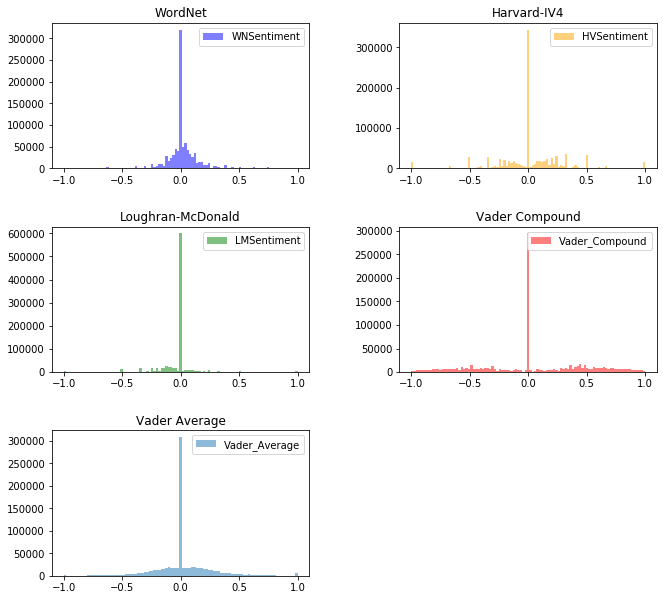

In [79]:
bins = np.linspace(-1, 1, 100)


pyplot.subplot(321)
pyplot.title('WordNet')
pyplot.hist(post_data['WNSentiAvg'], bins, alpha=0.5, label='WNSentiment', color = 'blue')
pyplot.legend(loc='upper right')

pyplot.subplot(322)
pyplot.title('Harvard-IV4')
pyplot.hist(post_data['HVSentiAvg'], bins, alpha=0.5, label='HVSentiment', color = 'orange' )
pyplot.legend(loc='upper right')

pyplot.subplot(323)
pyplot.title('Loughran-McDonald')
pyplot.hist(post_data['LMSentiAvg'], bins, alpha=0.5, label='LMSentiment', color = 'green')
pyplot.legend(loc='upper right')

pyplot.subplot(324)
pyplot.title('Vader Compound')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound', color = 'red')
pyplot.legend(loc='upper right')

pyplot.subplot(325)
pyplot.title('Vader Average')
pyplot.hist(post_data['Vader_Positive'] - post_data['Vader_Negative'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')



plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.5
                    , hspace=0.4,
                    wspace=0.35)

pyplot.savefig('CommentsDistribution.pdf',bbox_inches='tight')

pyplot.show()

Text(0, 0.5, 'Posts')

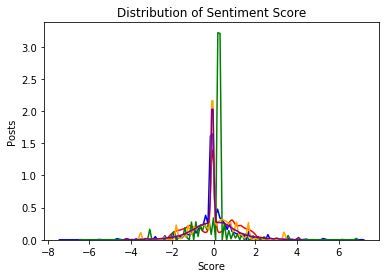

In [13]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['WNSentiAvg'] - post_data['WNSentiAvg'].mean())/post_data['WNSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['LMSentiAvg'] - post_data['LMSentiAvg'].mean())/post_data['LMSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['HVSentiAvg'] - post_data['HVSentiAvg'].mean())/post_data['HVSentiAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [81]:
print(post_data[['WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].describe().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     WNSentiAvg &     HVSentiAvg &     LMSentiAvg &  Vader\_Compound &  Vader\_Average \\
\midrule
count &  921689.000000 &  921689.000000 &  921689.000000 &   921689.000000 &  921689.000000 \\
mean  &       0.019345 &       0.023260 &      -0.030006 &        0.036540 &       0.025321 \\
std   &       0.146322 &       0.295322 &       0.149591 &        0.466401 &       0.253342 \\
min   &      -1.000000 &      -1.000000 &      -1.000000 &       -1.000000 &      -1.000000 \\
25\%   &      -0.019231 &      -0.071429 &      -0.030303 &       -0.273200 &      -0.064000 \\
50\%   &       0.000000 &       0.000000 &       0.000000 &        0.000000 &       0.000000 \\
75\%   &       0.062500 &       0.153846 &       0.000000 &        0.401900 &       0.128000 \\
max   &       1.000000 &       1.000000 &       1.000000 &        0.999900 &       1.000000 \\
\bottomrule
\end{tabular}



In [57]:
post_data[['News_Agiency','WNSentiAvg','HVSentiAvg','LMSentiAvg','Vader_Compound','Vader_Average']].groupby('News_Agiency').describe().transpose()

News_Agiency             Bloomberg  Businessinsider           CNN  \
WNSentiAvg     count  53675.000000    263695.000000  78448.000000   
               mean       0.027316         0.020565      0.007701   
               std        0.152161         0.149799      0.121939   
               min       -1.000000        -1.000000     -1.000000   
               25%        0.000000        -0.006579     -0.035714   
               50%        0.000000         0.000000      0.000000   
               75%        0.062500         0.062500      0.050000   
               max        1.000000         1.000000      1.000000   
HVSentiAvg     count  53675.000000    263695.000000  78448.000000   
               mean       0.029766         0.021418      0.017551   
               std        0.300635         0.295363      0.263555   
               min       -1.000000        -1.000000     -1.000000   
               25%        0.000000         0.000000     -0.111111   
               50%        0.000000         0.000000      0.000000   
               75%        0.142857         0.142857      0.142857   
               max        1.000000         1.000000      1.000000   
LMSentiAvg     count  53675.000000    263695.000000  78448.000000   
               mean      -0.026680        -0.023602     -0.043224   
               std        0.160795         0.146226      0.129430   
               min       -1.000000        -1.000000     -1.000000   
               25%        0.000000         0.000000     -0.085714   
               50%        0.000000         0.000000      0.000000   
               75%        0.000000         0.000000      0.000000   
               max        1.000000         1.000000      1.000000   
Vader_Compound count  53675.000000    263695.000000  78448.000000   
               mean       0.060407         0.047926     -0.026248   
               std        0.432794         0.437232      0.529968   
               min       -0.999500        -0.999700     -0.999700   
               25%       -0.051600        -0.128000     -0.470550   
               50%        0.000000         0.000000      0.000000   
               75%        0.401900         0.381800      0.401900   
               max        0.999200         0.999800      0.999700   
Vader_Average  count  53675.000000    263695.000000  78448.000000   
               mean       0.039514         0.032074      0.003649   
               std        0.266782         0.258374      0.209523   
               min       -1.000000        -1.000000     -1.000000   
               25%       -0.010000        -0.030000     -0.109000   
               50%        0.000000         0.000000      0.000000   
               75%        0.133000         0.133000      0.106000   
               max        1.000000         1.000000      1.000000   

News_Agiency                 Forbes       FoxNews            WSJ  \
WNSentiAvg     count  203155.000000  55465.000000  208495.000000   
               mean        0.024818      0.020756       0.012330   
               std         0.151719      0.172839       0.134701   
               min        -1.000000     -1.000000      -1.000000   
               25%        -0.011364     -0.027778      -0.025000   
               50%         0.000000      0.000000       0.000000   
               75%         0.062500      0.062500       0.055556   
               max         1.000000      1.000000       1.000000   
HVSentiAvg     count  203155.000000  55465.000000  208495.000000   
               mean        0.035546     -0.011535       0.019700   
               std         0.296180      0.351318       0.286015   
               min        -1.000000     -1.000000      -1.000000   
               25%         0.000000     -0.157895      -0.095238   
               50%         0.000000      0.000000       0.000000   
               75%         0.166667      0.142857       0.161290   
               max         1.000000      1.000000       1.000000   
LMSentiAvg    

In [58]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [59]:
post_data['DateMonth'].head()

0    2021-05
1    2021-05
2    2021-05
3    2021-05
4    2021-05
Name: DateMonth, dtype: object

In [60]:
post_data.columns

Index(['ID', 'PostID', 'PostDate', 'CommentID', 'CommentDate', 'CommenterURL',
       'CommentText', 'WNPositive', 'WNNegative', 'WNNeutral', 'WNSentiment',
       'WNTokenQnt', 'WNSentiAvg', 'HVPositive', 'HVNegative', 'HVTokenQnt',
       'HVSentiAvg', 'LMPositive', 'LMNegative', 'LMTokenQnt', 'LMSentiAvg',
       'Vader_Positive', 'Vader_Negative', 'Vader_Neutral', 'Vader_Compound',
       'News_Agiency', 'Vader_Average', 'DateMonth', 'DateDay'],
      dtype='object')

In [61]:
Monthly_Data = post_data.groupby('DateMonth').agg({'WNSentiAvg': 'sum'
                                                         ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                       })

In [62]:
DailyData = post_data.groupby('DateDay').agg({'WNSentiAvg': 'sum'
                                                        ,'WNTokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'HVPositive':'sum'
                                                        ,'HVNegative':'sum'
                                                        ,'HVTokenQnt':'sum'
                                                        ,'LMPositive':'sum'
                                                        ,'LMNegative':'sum'
                                                        ,'LMTokenQnt':'sum'
                                                        })

In [63]:
DailyData['WNSentiment'] =  DailyData['WNSentiAvg']/ DailyData['WNTokenQnt']
DailyData['HVSentiment'] = (DailyData['HVPositive'] - DailyData['HVNegative'])/DailyData['HVTokenQnt']
DailyData['LMSentiment'] = (DailyData['LMPositive'] - DailyData['LMNegative'])/DailyData['LMTokenQnt']

Monthly_Data['WNSentiment'] =  Monthly_Data['WNSentiAvg']/ Monthly_Data['WNTokenQnt']
Monthly_Data['HVSentiment'] = (Monthly_Data['HVPositive'] - Monthly_Data['HVNegative'])/Monthly_Data['HVTokenQnt']
Monthly_Data['LMSentiment'] = (Monthly_Data['LMPositive'] - Monthly_Data['LMNegative'])/Monthly_Data['LMTokenQnt']



In [64]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['WNSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -12.2589
p-value                           0.0000
#Lags Used                       13.0000
Number of Observations Used    3202.0000
Critical Value (1%)              -3.4324
Critical Value (5%)              -2.8624
Critical Value (10%)             -2.5673
dtype: float64


In [65]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['HVSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -10.1501
p-value                           0.0000
#Lags Used                       14.0000
Number of Observations Used    3201.0000
Critical Value (1%)              -3.4324
Critical Value (5%)              -2.8624
Critical Value (10%)             -2.5673
dtype: float64


In [25]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['LMSentiment'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -9.5285
p-value                           0.0000
#Lags Used                       19.0000
Number of Observations Used    2213.0000
Critical Value (1%)              -3.4333
Critical Value (5%)              -2.8628
Critical Value (10%)             -2.5675
dtype: float64
Results of Dickey-Fuller Test:


In [26]:
for i in range(len(dfoutput)):
    dfoutput[i] = round(dfoutput[i],4)
print(dfoutput)
print('Results of Dickey-Fuller Test:')
dftest = adfuller(DailyData['Vader_Compound'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value


Test Statistic                   -9.0827
p-value                           0.0000
#Lags Used                       26.0000
Number of Observations Used    2206.0000
Critical Value (1%)              -3.4333
Critical Value (5%)              -2.8629
Critical Value (10%)             -2.5675
dtype: float64
Results of Dickey-Fuller Test:


In [66]:
DailyData.head()

,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
DateDay,,,,,,,,,,,,,
2011-06-23,0.000000,1,-0.631000,-0.165000,0,1,8,0,1,8,0.000000,-0.125000,-0.125000
2011-07-11,0.125000,1,0.668800,0.219000,1,0,9,0,0,9,0.125000,0.111111,0.000000
2011-07-26,2.397785,68,0.027710,0.032676,121,96,625,13,32,625,0.035262,0.040000,-0.030400
2011-07-27,3.014190,72,0.134261,0.063931,94,55,443,13,21,443,0.041864,0.088036,-0.018059
2011-07-28,1.904804,102,0.047419,0.044549,178,142,986,30,51,986,0.018675,0.036511,-0.021298


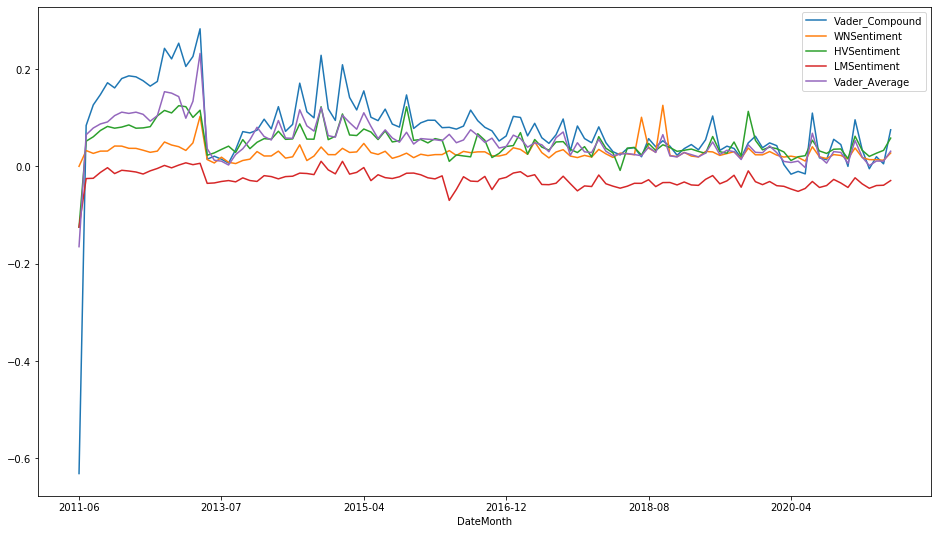

In [67]:
Monthly_Data[['Vader_Compound','WNSentiment','HVSentiment','LMSentiment','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [68]:
SnP_daily = web.get_data_yahoo('^GSPC','01/01/2020','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','01/01/2020','05/01/2021',interval='m')

In [69]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [70]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [71]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [72]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [73]:
def grangerTest(exog, endog):
    MAX_LAG = 30
    ARaic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(exog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numExog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for exog data is " + str(numExog))

    ARaic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="aic")
    ARbic = AR(endog.tolist()).fit(maxlag=MAX_LAG, ic="bic")
    # select the fewer number of parameters between both criteria.
    numEndog = len(ARaic.params) if len(ARaic.params) < len(ARbic.params) else len(ARbic.params)

    print ("Optimal number of lags for endog data is " + str(numEndog))

    # now that I know the optimal number of parameters, I can call the
    # granger causality function of statsmodels.
    data = pd.concat([endog, exog], axis=1)
    print ("\nGranger causality results of indep onto dep")
    results = grangercausalitytests(data, maxlag=numEndog)

    data = pd.concat([exog, endog], axis=1)
    print ("\nGranger causality results of dep onto indep")
    results = grangercausalitytests(data, maxlag=numExog)
    regr = results[2][1]
    print (regr[0].params)
    print (regr[1].params)
    print (regr[1].pvalues)

In [74]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [75]:
Granger_data_daily.head()

,High,Low,Open,Close,Volume,Adj Close,LogReturn,WNSentiAvg,WNTokenQnt,Vader_Compound,Vader_Average,HVPositive,HVNegative,HVTokenQnt,LMPositive,LMNegative,LMTokenQnt,WNSentiment,HVSentiment,LMSentiment
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,NaN,4.693307,27,0.161819,0.094000,44,26,251,4,14,251,0.173826,0.071713,-0.039841
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,-0.007085,3.751712,99,0.219997,0.077212,154,87,883,30,33,883,0.037896,0.075878,-0.003398
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,0.003527,-0.068848,8,0.067762,0.142375,10,9,72,3,5,72,-0.008606,0.013889,-0.027778
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,-0.002807,2.557686,66,0.005048,0.043758,96,67,622,20,30,622,0.038753,0.046624,-0.016077
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,0.004890,0.220238,9,0.156022,0.136889,7,5,40,1,1,40,0.024471,0.050000,0.000000


In [76]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [77]:
Vars = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]
for Var in Vars:
    print("\n" + Var + "\n")
    grangerTest(Granger_data_daily[Var][1:], Granger_data_daily['LogReturn'][1:])


Vader_Compound

Optimal number of lags for exog data is 3


C:\Users\Windows\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7216  , p=0.1904  , df_denom=330, df_num=1
ssr based chi2 test:   chi2=1.7373  , p=0.1875  , df=1
likelihood ratio test: chi2=1.7328  , p=0.1881  , df=1
parameter F test:         F=1.7216  , p=0.1904  , df_denom=330, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7557  , p=0.4705  , df_denom=327, df_num=2
ssr based chi2 test:   chi2=1.5346  , p=0.4643  , df=2
likelihood ratio test: chi2=1.5311  , p=0.4651  , df=2
parameter F test:         F=0.7557  , p=0.4705  , df_denom=327, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5462  , p=0.6510  , df_denom=324, df_num=3
ssr based chi2 test:   chi2=1.6741  , p=0.6427  , df=3
likelihood ratio test: chi2=1.6699  , p=0.6436  , df=3
parameter F test:         F=0.5462  , p=0.6510  , df_denom=324, df_num=3

Gran

Optimal number of lags for exog data is 2
Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5839  , p=0.4453  , df_denom=330, df_num=1
ssr based chi2 test:   chi2=0.5892  , p=0.4427  , df=1
likelihood ratio test: chi2=0.5887  , p=0.4429  , df=1
parameter F test:         F=0.5839  , p=0.4453  , df_denom=330, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4729  , p=0.6236  , df_denom=327, df_num=2
ssr based chi2 test:   chi2=0.9602  , p=0.6187  , df=2
likelihood ratio test: chi2=0.9588  , p=0.6192  , df=2
parameter F test:         F=0.4729  , p=0.6236  , df_denom=327, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3041  , p=0.8224  , df_denom=324, df_num=3
ssr based chi2 test:   chi2=0.9320  , p=0.8177  , df=3
likelihood ratio test: chi2=0.9307  , p=0.8180  , df=3
parameter F test:         F=0.3041  

Optimal number of lags for exog data is 3
Optimal number of lags for endog data is 10

Granger causality results of indep onto dep

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9766  , p=0.3238  , df_denom=330, df_num=1
ssr based chi2 test:   chi2=0.9855  , p=0.3208  , df=1
likelihood ratio test: chi2=0.9840  , p=0.3212  , df=1
parameter F test:         F=0.9766  , p=0.3238  , df_denom=330, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8609  , p=0.4237  , df_denom=327, df_num=2
ssr based chi2 test:   chi2=1.7482  , p=0.4172  , df=2
likelihood ratio test: chi2=1.7436  , p=0.4182  , df=2
parameter F test:         F=0.8609  , p=0.4237  , df_denom=327, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6047  , p=0.6124  , df_denom=324, df_num=3
ssr based chi2 test:   chi2=1.8532  , p=0.6034  , df=3
likelihood ratio test: chi2=1.8480  , p=0.6045  , df=3
parameter F test:         F=0.6047  

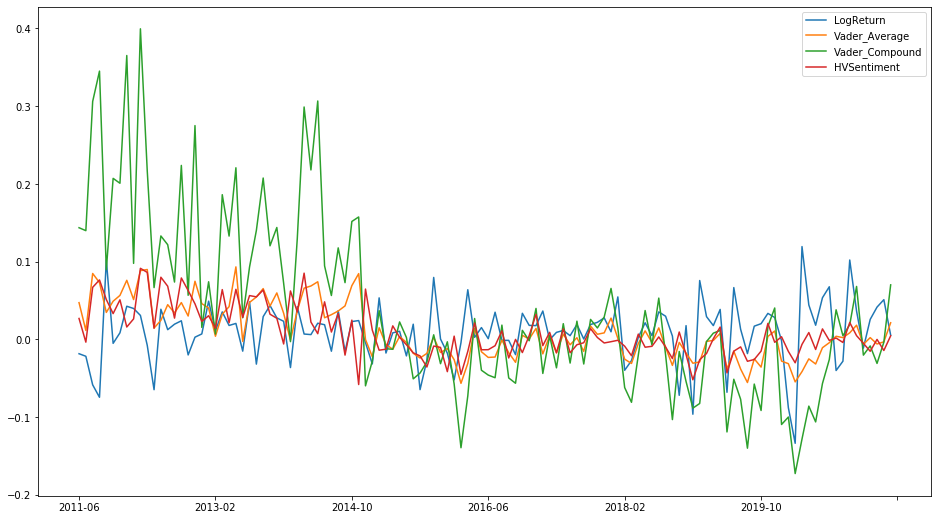

In [28]:
Granger_data_monthly[['LogReturn','Vader_Average','Vader_Compound','HVSentiment']].plot(legend=True, figsize=(16,9))

In [84]:
corr = Granger_data_daily[["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment","LogReturn"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Vader_Average,WNSentiment,HVSentiment,LMSentiment,LogReturn
Vader_Compound,1.000000,0.869222,0.580757,0.687332,0.654300,0.051698
Vader_Average,0.869222,1.000000,0.634118,0.631189,0.620447,0.056939
WNSentiment,0.580757,0.634118,1.000000,0.450277,0.444627,0.030462
HVSentiment,0.687332,0.631189,0.450277,1.000000,0.672040,0.065928
LMSentiment,0.654300,0.620447,0.444627,0.672040,1.000000,0.019994
LogReturn,0.051698,0.056939,0.030462,0.065928,0.019994,1.000000


In [83]:
pvals = [] 
for col in ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"]:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ["Vader_Compound","Vader_Average","WNSentiment","HVSentiment","LMSentiment"])
corr_signif

,p-value
Vader_Compound,0.346237
Vader_Average,0.299482
WNSentiment,0.579062
HVSentiment,0.229491
LMSentiment,0.715810


In [38]:
pvals_mnt = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals_mnt.append(scipy.stats.linregress(Granger_data_monthly['LogReturn'][1:], Granger_data_monthly[col][1:].dropna())[3])
corr_signif_mnt = pd.DataFrame(pvals_mnt,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif_mnt

,p-value
Vader_Compound,0.084306
Flair_Score,0.977764
SentimentScoreAdj,0.311650
Vader_Average,0.047369
